In [1]:
#importing basic libraries required
import numpy as np
import pandas as pd
#importing visualisation libraries
import matplotlib.pyplot as plt  
import seaborn as sns


In [2]:
#importing sklearn libraries
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler


In [3]:
df=pd.read_csv('diamonds.csv')
df.head()
#first 5 rows

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [4]:
df.drop('Unnamed: 0',axis=1,inplace=True)
#dropping duplicate index column

In [5]:
df.info()
#9 features and one numeric continous label('Price').
#No missing values. Total no of records is equal to 53940

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    53940 non-null  float64
 1   cut      53940 non-null  object 
 2   color    53940 non-null  object 
 3   clarity  53940 non-null  object 
 4   depth    53940 non-null  float64
 5   table    53940 non-null  float64
 6   price    53940 non-null  int64  
 7   x        53940 non-null  float64
 8   y        53940 non-null  float64
 9   z        53940 non-null  float64
dtypes: float64(6), int64(1), object(3)
memory usage: 4.1+ MB


In [6]:
df.describe()
#Expect the label column, all the columns does not contain skewness.

,carat,depth,table,price,x,y,z
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,0.797940,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,0.474011,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


<Axes: xlabel='z', ylabel='Count'>

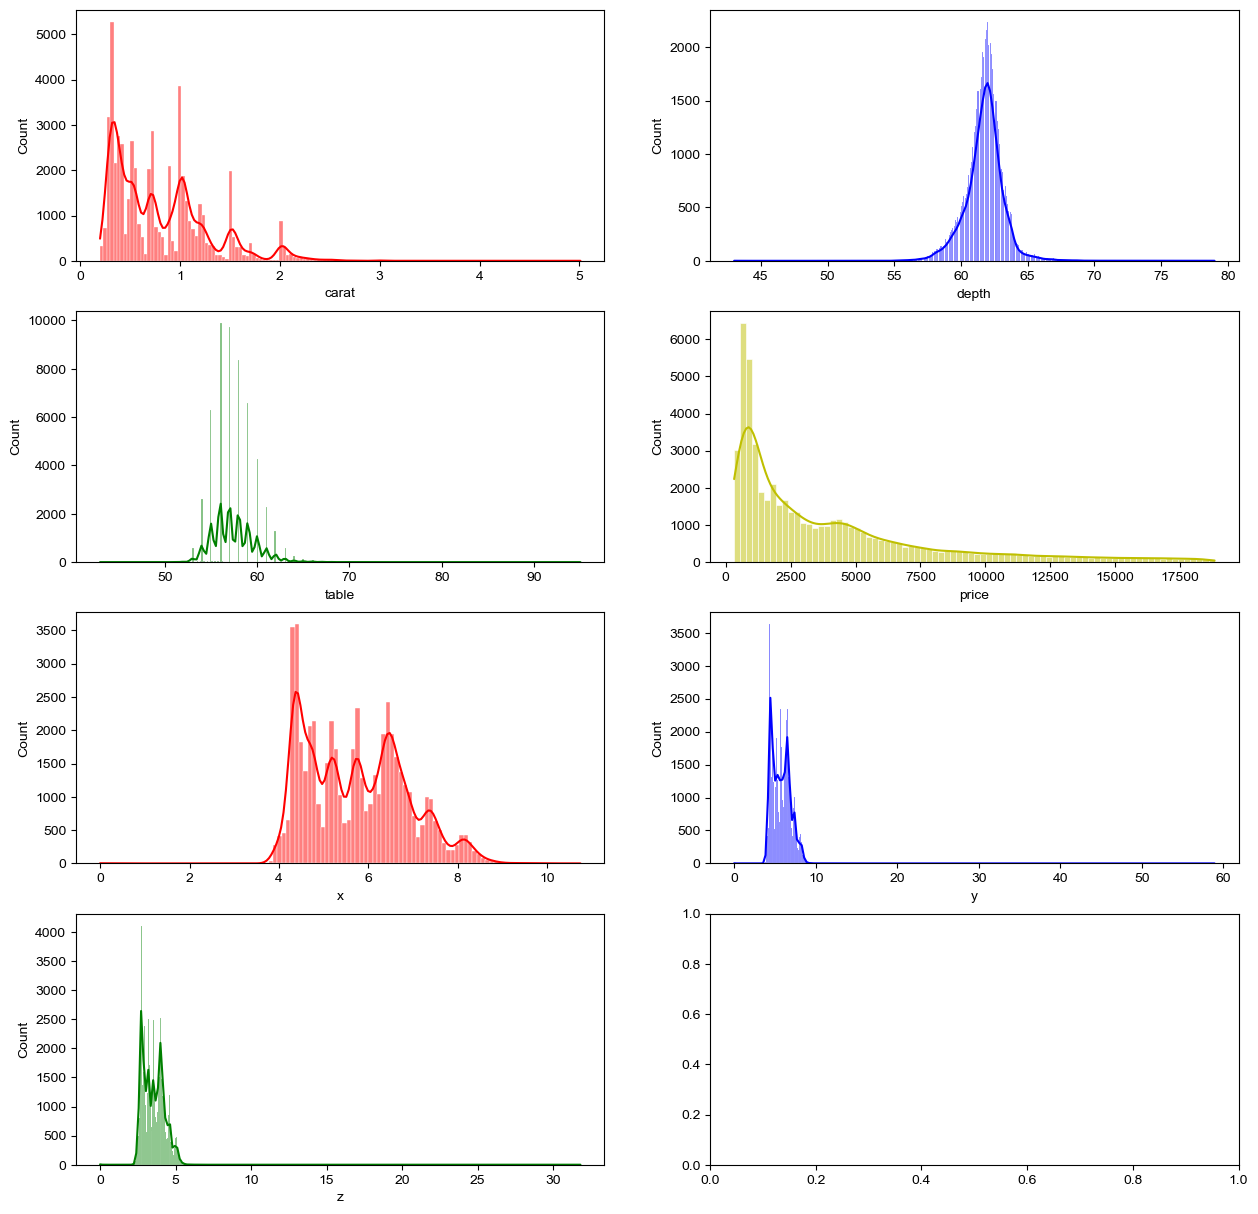

In [7]:
fig,ax=plt.subplots(4,2,figsize=(15,15))
sns.set_style('darkgrid')
sns.histplot(df,x='carat',ax=ax[0,0],color='r',kde=True)
sns.histplot(df,x='depth',ax=ax[0,1],color='b',kde=True)
sns.histplot(df,x='table',ax=ax[1,0],color='g',kde=True)
sns.histplot(df,x='price',ax=ax[1,1],color='y',kde=True)
sns.histplot(df,x='x',ax=ax[2,0],color='r',kde=True)
sns.histplot(df,x='y',ax=ax[2,1],color='b',kde=True)
sns.histplot(df,x='z',ax=ax[3,0],color='g',kde=True)

In [8]:
df.head(0)

,carat,cut,color,clarity,depth,table,price,x,y,z


<Axes: xlabel='clarity', ylabel='count'>

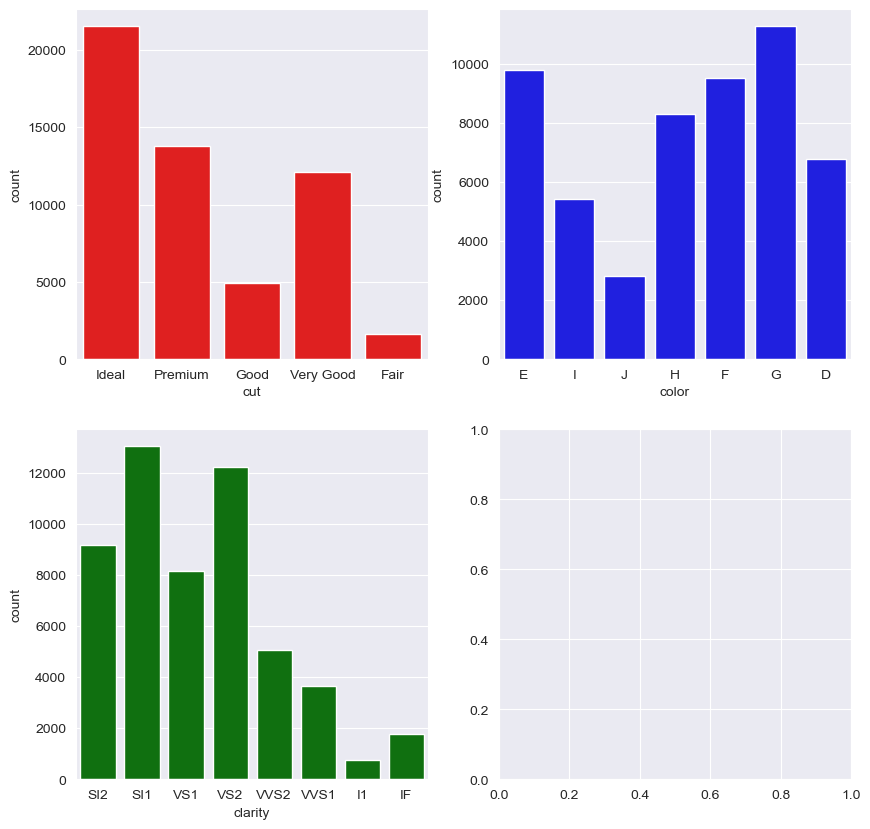

In [9]:
fig,ax=plt.subplots(2,2,figsize=(10,10))
sns.set_style('darkgrid')
sns.countplot(df,x='cut',ax=ax[0,0],color='r')
sns.countplot(df,x='color',ax=ax[0,1],color='b')
sns.countplot(df,x='clarity',ax=ax[1,0],color='g')
#Most diamonds are with ideal cut type.
#the I and J color ranges are less used.
#Most diamonds are with SI1 and VS2 clarity.

### Multi Variate

<Axes: xlabel='carat', ylabel='price'>

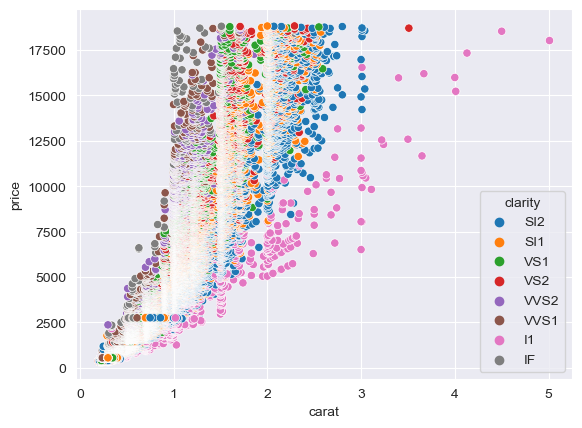

In [10]:
#Does diamonds with high carats have any effect on the price?
sns.scatterplot(df,x='carat',y='price',hue='clarity')
#this shows with increase in the carats, the price of the diamond increases, which is obvious in nature.

<Axes: >

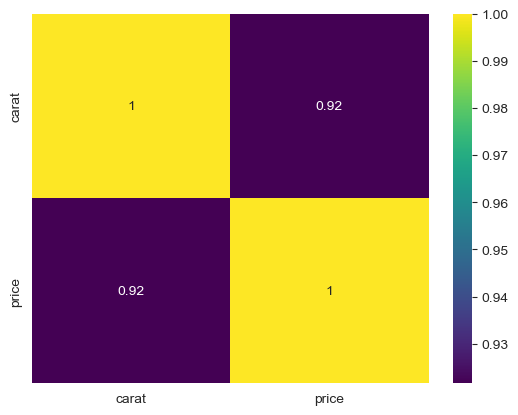

In [11]:
sns.heatmap(df[['carat','price']].corr(),annot=True,cmap='viridis')
#carats and price has high correlation.

C:\Users\naren\AppData\Local\Temp\ipykernel_19176\701140806.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),annot=True,cmap='viridis')


<Axes: >

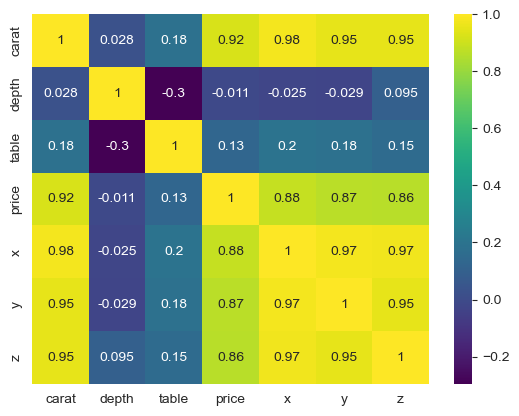

In [12]:
#in the same way lets check the correlation for all the features and label column with heat map.
sns.heatmap(df.corr(),annot=True,cmap='viridis')
#Price also has high correlation ith dimensions of the Diamond. Also we can see multicolinearity between the features dimensions and carats.

<Axes: xlabel='clarity', ylabel='price'>

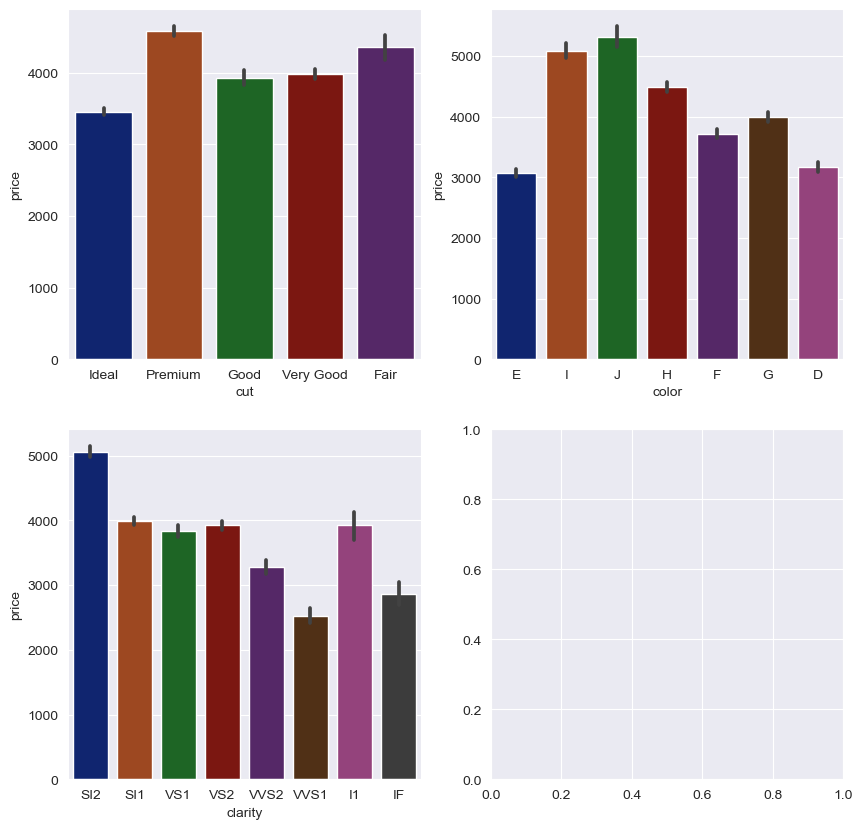

In [13]:
#which type of cut,clarity and color contribute to the highest price in diamond?
fig,ax=plt.subplots(2,2,figsize=(10,10))
sns.barplot(df,x='cut',y='price',palette='dark',ax=ax[0,0])
sns.barplot(df,x='color',y='price',palette='dark',ax=ax[0,1])
sns.barplot(df,x='clarity',y='price',palette='dark',ax=ax[1,0])
#ideal type cut could be more genric type of cut as the price of ideal is less although its the frequently used one.
#I and J colours could be from Premium colour range. They are very rarely used but the price quote is high.


In [14]:
df.groupby(['cut'])['price',].mean().sort_values(by='price')

,price
cut,
Ideal,3457.541970
Good,3928.864452
Very Good,3981.759891
Fair,4358.757764
Premium,4584.257704


### outliers

<Axes: xlabel='z'>

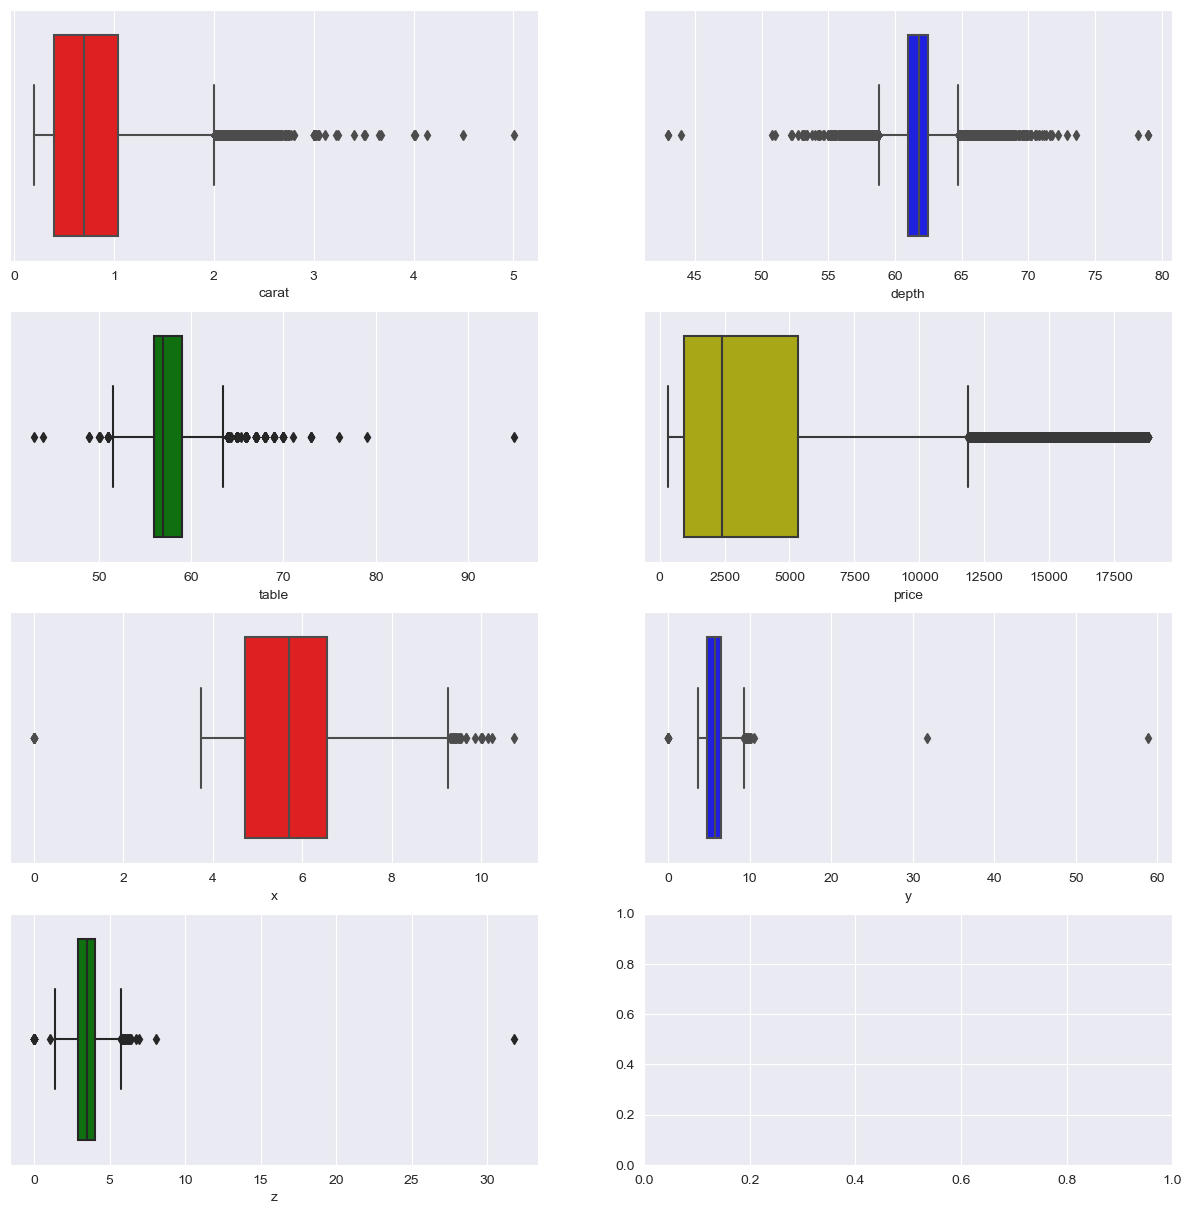

In [15]:
fig,ax=plt.subplots(4,2,figsize=(15,15))
sns.boxplot(df,x='carat',ax=ax[0,0],color='r')
sns.boxplot(df,x='depth',ax=ax[0,1],color='b')
sns.boxplot(df,x='table',ax=ax[1,0],color='g')
sns.boxplot(df,x='price',ax=ax[1,1],color='y')
sns.boxplot(df,x='x',ax=ax[2,0],color='r')
sns.boxplot(df,x='y',ax=ax[2,1],color='b')
sns.boxplot(df,x='z',ax=ax[3,0],color='g')

In [16]:
df_num=df.select_dtypes('number')
Q1=df_num.quantile(0.25)
Q3=df_num.quantile(0.75)
IQR=Q3-Q1

In [17]:
upper_bound=Q3+IQR
lower_bound=Q1-IQR

In [18]:
lower_bound

carat      -0.24
depth      59.50
table      53.00
price   -3424.25
x           2.88
y           2.90
z           1.78
dtype: float64

In [19]:
df_outliers=df[(df_num['price']>upper_bound['price'])]

In [20]:
df_outliers

,carat,cut,color,clarity,depth,table,price,x,y,z
21598,1.33,Premium,G,VS1,62.7,58.0,9699,6.96,7.01,4.38
21599,1.52,Premium,H,SI1,61.0,58.0,9700,7.44,7.39,4.52
21600,1.52,Ideal,H,SI1,61.8,57.0,9700,7.43,7.32,4.56
21601,1.50,Good,I,VS1,57.2,62.0,9702,7.64,7.61,4.36
21602,1.50,Good,I,VS1,57.2,62.0,9702,7.64,7.61,4.36
...,...,...,...,...,...,...,...,...,...,...
27745,2.00,Very Good,H,SI1,62.8,57.0,18803,7.95,8.00,5.01
27746,2.07,Ideal,G,SI2,62.5,55.0,18804,8.20,8.13,5.11
27747,1.51,Ideal,G,IF,61.7,55.0,18806,7.37,7.41,4.56
27748,2.00,Very Good,G,SI1,63.5,56.0,18818,7.90,7.97,5.04


<Axes: xlabel='clarity', ylabel='count'>

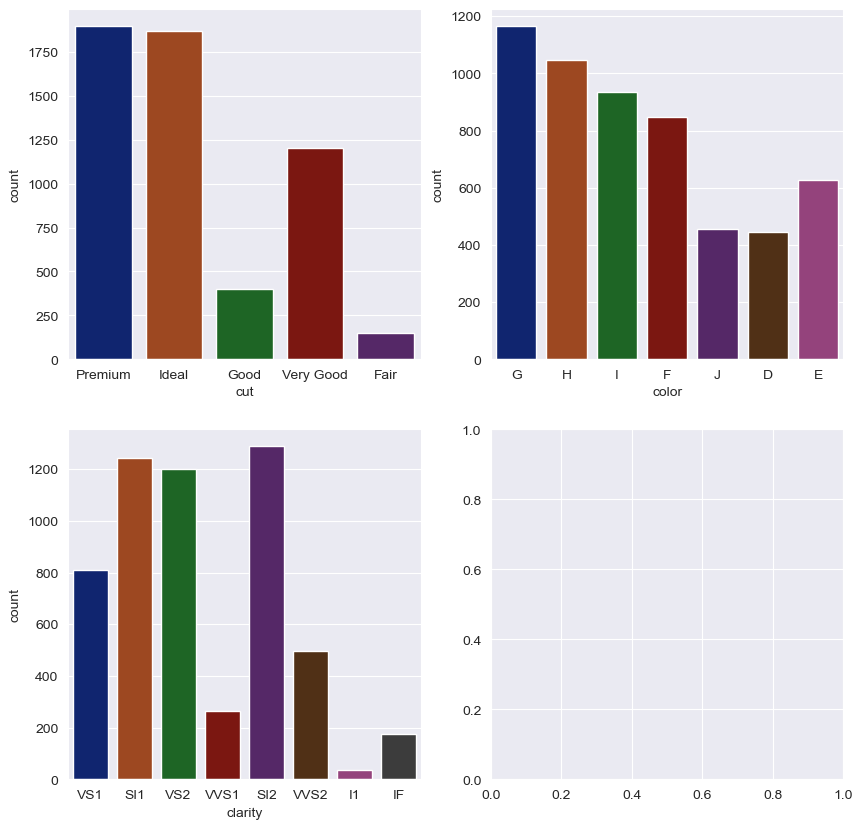

In [21]:
fig,ax=plt.subplots(2,2,figsize=(10,10))
sns.countplot(df_outliers,x='cut',palette='dark',ax=ax[0,0])
sns.countplot(df_outliers,x='color',palette='dark',ax=ax[0,1])
sns.countplot(df_outliers,x='clarity',palette='dark',ax=ax[1,0])

In [22]:
pd.pivot_table(df_outliers,index='color',values='price',aggfunc={'count','sum','mean'})
#by looking at the above visualisations and tables, we can saythat the outliers are not systematic. we can trim off the outliers.

,count,mean,sum
color,,,
D,444,13128.612613,5829104
E,627,13167.089314,8255765
F,847,13316.867769,11279387
G,1166,13354.647513,15571519
H,1048,13510.910305,14159434
I,935,13789.419251,12893107
J,455,13616.958242,6195716


In [23]:
df=df[((df_num>lower_bound) & (df_num<upper_bound)).all(axis='columns')]

<Axes: xlabel='z'>

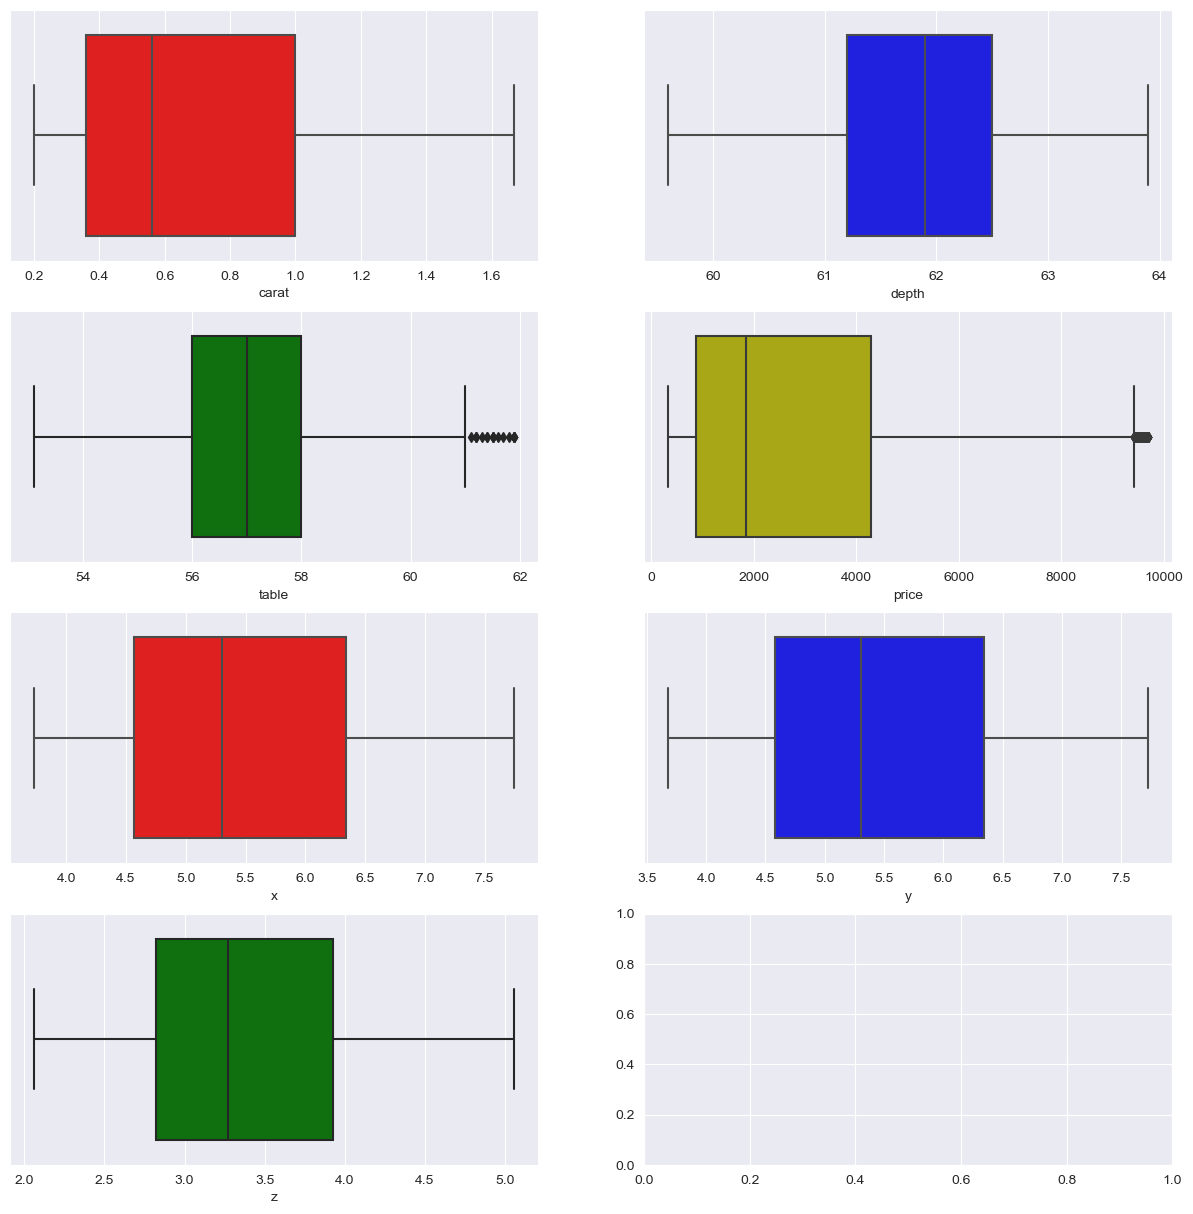

In [24]:
#checking the outliers again
fig,ax=plt.subplots(4,2,figsize=(15,15))
sns.boxplot(df,x='carat',ax=ax[0,0],color='r')
sns.boxplot(df,x='depth',ax=ax[0,1],color='b')
sns.boxplot(df,x='table',ax=ax[1,0],color='g')
sns.boxplot(df,x='price',ax=ax[1,1],color='y')
sns.boxplot(df,x='x',ax=ax[2,0],color='r')
sns.boxplot(df,x='y',ax=ax[2,1],color='b')
sns.boxplot(df,x='z',ax=ax[3,0],color='g')
#now we have more leveled data.

### encoding cat coloumns

In [25]:
df_cat=df.select_dtypes('object')
df_num=df.select_dtypes('number')
y=df['price']

In [26]:
ms=MinMaxScaler()

In [27]:
df_cat_encoded=pd.get_dummies(df_cat,columns=df_cat.columns)
df_num_scaled=pd.DataFrame(ms.fit_transform(df_num),index=df.index,columns=df_num.columns)
df_num_scaled.drop('price',axis=1,inplace=True)

In [28]:
df_num_scaled.shape, df_cat_encoded.shape

((41472, 6), (41472, 20))

In [29]:
X=pd.concat([df_num_scaled,df_cat_encoded],axis=1)

In [30]:
X.shape, y.shape

((41472, 26), (41472,))

### Train Test Split

In [31]:
X_train,X_test,y_train,y_test=train_test_split(X,y,train_size=0.7,test_size=0.3)

In [32]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((29030, 26), (12442, 26), (29030,), (12442,))

In [33]:
X_train.iloc[:,0:].shape

(29030, 26)

### Random Forest

In [34]:
from sklearn.tree import DecisionTreeRegressor,export_graphviz,plot_tree
from sklearn.metrics import mean_absolute_percentage_error
from warnings import filterwarnings
filterwarnings("ignore")

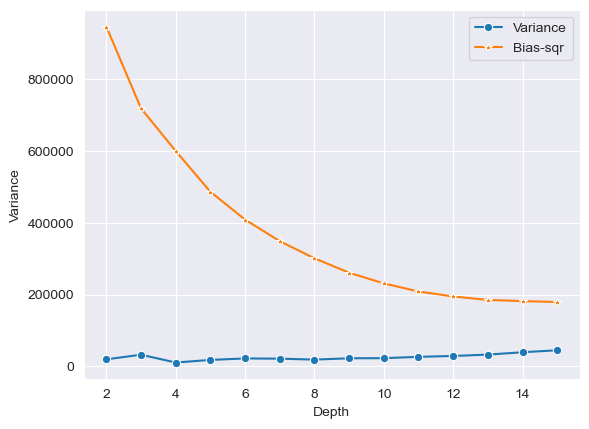

In [35]:
variance_lst=[]
bias_lst=[]
B=13
for j in range(2,16,1):   #running this for various levels of depth. i.e 2 to 16
    df_rf=pd.DataFrame()    #creating an empty Dataframe
    for i in np.arange(1,B,1):      #This Loop is for fitting B models. In this case its 6.
        X_train_RF=X_train.sample(frac=0.9)    #randomly selecting 90 of the rows from original train dataset
        y_train_RF=y_train.loc[X_train_RF.index]
        dtree=DecisionTreeRegressor(max_depth=j)
        model=dtree.fit(X_train_RF,y_train_RF)    #fitting the model with Train data
        pred_rf=model.predict(X_test)             #X_test is used for prediction and it is stored in df_rf
        df_rf[f'yhat_{i}']=pred_rf
#In the below step the expected yhat value is calculated and added as column in the Dataframe
    df_rf['exp_yhat']= df_rf.sum(axis=1)/B
    df_rf.index=X_test.index  
    df_rf['y'] = y_test     
    df_rf['variance']=0
    df_rf['bias']=(df_rf['exp_yhat']-df_rf['y'])**2           #calculating Bias-square
    for k in range(0,len(df_rf)):
        df_rf['variance'].iloc[k]=df_rf.iloc[k,0:B].var(ddof=0) #calculating Variance
    variance_lst.append(df_rf['variance'].mean())
    bias_lst.append(df_rf['bias'].mean())
#     print(df_rf['variance'].mean(),df_rf['bias'].mean())
df_var_bias=pd.DataFrame({'Depth':list(np.arange(2,16,1)),'Variance':variance_lst,'Bias':bias_lst})  
sns.lineplot(df_var_bias,x='Depth',y='Variance',marker='o',label='Variance')
sns.lineplot(df_var_bias,x='Depth',y='Bias',marker='*',label='Bias-sqr')
plt.legend()

<Axes: xlabel='Depth', ylabel='Variance'>

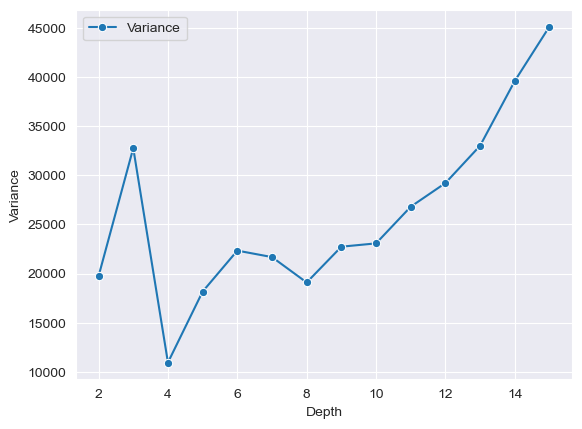

In [36]:
sns.lineplot(df_var_bias,x='Depth',y='Variance',marker='o',label='Variance')

In [45]:
df_rf.hea

1835.0462454212454

### Decision Tree Regressor

In [35]:
lst=[]
for i in np.arange(2,9,1):
    dtree=DecisionTreeRegressor(max_depth=i)
    model=dtree.fit(X_train,y_train)
    pred=model.predict(X_test)
    variance=pred.var(ddof=0)
    dtree_pred=pd.DataFrame({'predicted':pred,'Actual':y_test})
    bias=np.sum(np.square(dtree_pred['predicted'].mean()-dtree_pred['Actual']))
    lst.append(bias)
    print(variance,bias)
    


4554804.488778081 68086178236.0284
4761176.125306673 68086536801.909836
4933640.027528865 68084707005.51549
5069968.976259634 68084459688.6655
5140067.819319478 68084455481.09248
5229397.493555964 68084552179.05632
5274981.6872021835 68084493330.80893


In [36]:
from sklearn.neighbors import KNeighborsRegressor
#import KNN regression libraries

### Bagging method on KNN Regression

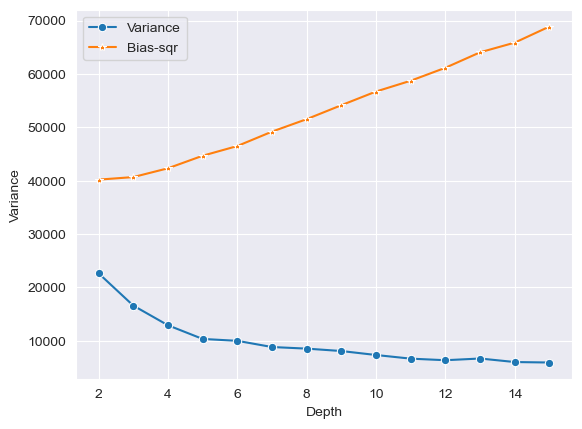

In [43]:
variance_lst=[]
bias_lst=[]
for j in range(2,16,1):   #running this for various levels of depth. i.e 2 to 16
    df_bg_knn=pd.DataFrame(columns=['yhat_1','yhat_2','yhat_3','yhat_4','yhat_5','yhat_6'])    #creating an empty Dataframe
    for i in np.arange(1,7,1):      #This Loop is for fitting B models. In this case its 6.
        X_train_RF=X_train.sample(frac=0.9)    #randomly selecting 90 of the rows from original train dataset
        y_train_RF=y_train.loc[X_train_RF.index]
        knn=KNeighborsRegressor(n_neighbors=j)
        model=knn.fit(X_train_RF,y_train_RF)    #fitting the model with Train data
        pred_knn=model.predict(X_test)             #X_test is used for prediction and it is stored in df_rf
        df_bg_knn[f'yhat_{i}']=pred_knn
#In the below step the expected yhat value is calculated and added as column in the Dataframe
    df_bg_knn['exp_yhat']=(df_bg_knn['yhat_1']+df_bg_knn['yhat_2']+df_bg_knn['yhat_3']+df_bg_knn['yhat_4']+df_bg_knn['yhat_5']
                           +df_bg_knn['yhat_6'])/6
    df_bg_knn.index=X_test.index  
    df_bg_knn['y'] = y_test     
    df_bg_knn['variance']=0
    df_bg_knn['bias']=(df_bg_knn['exp_yhat']-df_bg_knn['y'])**2/6           #calculating Bias-square
    for k in range(0,len(df_bg_knn)):
        df_bg_knn['variance'].iloc[k]=df_bg_knn.iloc[k,0:6].var(ddof=0) #calculating Variance
    variance_lst.append(df_bg_knn['variance'].mean())
    bias_lst.append(df_bg_knn['bias'].mean())
#     print(df_rf['variance'].mean(),df_rf['bias'].mean())
df_var_bias=pd.DataFrame({'Depth':list(np.arange(2,16,1)),'Variance':variance_lst,'Bias':bias_lst})  
sns.lineplot(df_var_bias,x='Depth',y='Variance',marker='o',label='Variance')
sns.lineplot(df_var_bias,x='Depth',y='Bias',marker='*',label='Bias-sqr')

plt.legend()

### Bagging Method on Linear Regression

In [39]:
from sklearn.linear_model import LinearRegression

In [40]:
variance_lst=[]
bias_lst=[]
for j in np.arange(1,27,1):   #running this for various levels of depth. i.e 2 to 16
    df_rf=pd.DataFrame(columns=['yhat_1','yhat_2','yhat_3','yhat_4','yhat_5','yhat_6'])    #creating an empty Dataframe
    for i in np.arange(1,7,1):      #This Loop is for fitting B models. In this case its 6.
        X_train_RF=X_train.iloc[:,:j].sample(frac=0.9)    #randomly selecting 90 of the rows from original train dataset
        y_train_RF=y_train.loc[X_train_RF.index]
        lr=LinearRegression(fit_intercept=False)
        model=lr.fit(X_train_RF,y_train_RF)    #fitting the model with Train data
        pred_lr=model.predict(X_test.iloc[:,:j])             #X_test is used for prediction and it is stored in df_rf
        df_rf[f'yhat_{i}']=pred_lr
#In the below step the expected yhat value is calculated and added as column in the Dataframe
    df_rf['exp_yhat']=(df_rf['yhat_1']+df_rf['yhat_2']+df_rf['yhat_3']+df_rf['yhat_4']+df_rf['yhat_5']+df_rf['yhat_6'])/6
    df_rf.index=X_test.index  
    df_rf['y'] = y_test     
    df_rf['variance']=0
    df_rf['bias']=(df_rf['exp_yhat']-df_rf['y'])**2/6           #calculating Bias-square
    for k in range(0,len(df_rf)):
        df_rf['variance'].iloc[k]=df_rf.iloc[k,0:6].var(ddof=0) #calculating Variance
    variance_lst.append(df_rf['variance'].mean())
    bias_lst.append(df_rf['bias'].mean())
    print(df_rf['variance'].mean(),df_rf['bias'].mean())
# df_var_bias=pd.DataFrame({'Features':list(np.arange(1,27,1)),'Variance':variance_lst,'Bias':bias_lst})  
# sns.lineplot(df_var_bias,x='Features',y='Variance',marker='o',label='Variance')
# sns.lineplot(df_var_bias,x='Features',y='Bias',marker='*',label='Bias-sqr')
# plt.legend()

1.2617951500892624 126146.46173344042
4.758786131709291 123159.96114850571
10.210403554680415 121845.9490212426
7.428521633424079 120700.68790644548
13.748909141181828 119577.52720377172
20.43196125270976 118971.31319211212
29.193173599997696 119007.29909146081
32.65016512769103 118630.98058384466
36.82779241999894 117916.94218651901
26.704198110136424 117908.72551426067
28.71026543675657 117505.83178423141
57.30062922918559 116490.19911747993
27.731212036057904 115499.36746815119
95.2316084434906 113083.96468649656
97.08415379710056 104871.38926809134
30.722737612639232 102120.54230664455
46.535054541912025 101123.36292099413
46.31614770746259 101124.28714484508
63.502078859935565 94890.58892938166
35.09910087767582 93653.30202920183
80.12820392578759 90667.89119271793
21.460257995419653 64652.93155790721
62.80152535296454 64630.85288333439
28.558805532002324 61662.69438631129
109.80533560072152 61636.56681260345
172.226002508585 61625.67009489912


<Axes: xlabel='Features', ylabel='Bias'>

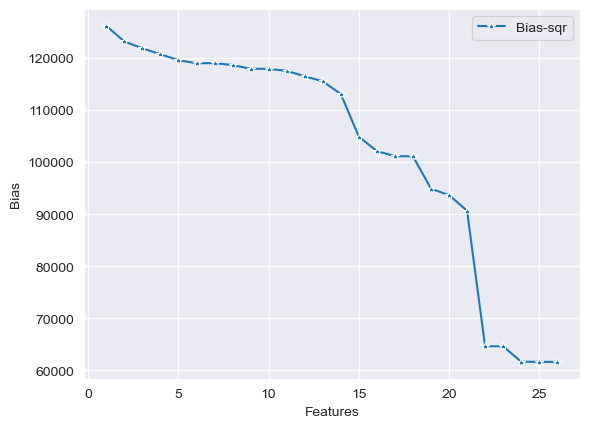

In [41]:
df_var_bias=pd.DataFrame({'Features':list(np.arange(1,27,1)),'Variance':variance_lst,'Bias':bias_lst})  
sns.lineplot(df_var_bias,x='Features',y='Bias',marker='*',label='Bias-sqr')

<Axes: xlabel='Features', ylabel='Variance'>

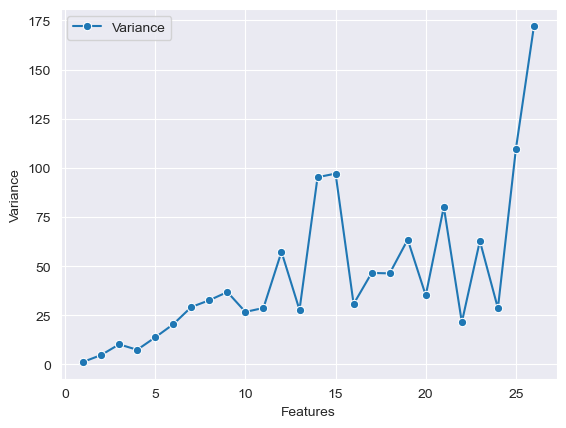

In [42]:
sns.lineplot(df_var_bias,x='Features',y='Variance',marker='o',label='Variance')